In [7]:
import  pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset

In [8]:
trip2 = pd.read_csv("aberant/trip_subtrip.csv",sep = ";")
trip2['duration_seconds'] = pd.to_timedelta(trip2['duration_x']).dt.total_seconds()


In [9]:
# Définir les seuils de vitesse moyenne acceptables pour chaque mode de transport
# Ces valeurs sont des exemples et peuvent nécessiter des ajustements
speed_thresholds = {
    "Walking": 20,  # km/h
    "Biking": 40,   # km/h
    "Bus": 110,     # km/h
    "Train": 250,   # km/h
    "Car": 160,      # km/h
    "BikeElectric" : 35,
    "CarElectric" : 160,
    "Metro": 40, 
    "MotoElectric": 160,
    "Scooter" : 90
}

# Convertir les types de transport dans trip2 pour correspondre aux clés dans speed_thresholds
trip2['subtrip_type'] = trip2['subtrip_type'].apply(lambda x: "Walking" if x == "Walking" else x)
trip2['subtrip_type'] = trip2['subtrip_type'].apply(lambda x: "Biking" if x == "Biking" else x)
# Répétez pour d'autres types si nécessaire

# Filtrer les données en éliminant les enregistrements avec des vitesses moyennes incohérentes
filtered_data = pd.DataFrame()
for transport_mode, speed_limit in speed_thresholds.items():
    # Sélectionner les données pour le mode de transport actuel
    mode_data = trip2[trip2['subtrip_type'] == transport_mode]
    
    # Filtrer les données basées sur le seuil de vitesse
    mode_data_filtered = mode_data[mode_data['avg_speed'] <= speed_limit]
    
    # Ajouter au DataFrame filtré
    filtered_data = pd.concat([filtered_data, mode_data_filtered])

# Vérifier les dimensions avant et après le filtrage
original_shape = trip2.shape
filtered_shape = filtered_data.shape

original_shape, filtered_shape


((8787, 19), (8618, 19))

In [10]:
filtered_data

,Unnamed: 0,id_utente_x,trip_id,subtrip_id,subtrip_type,points_x,calories_x,distance_x,avg_speed,duration_x,start_time_x,end_time_x,points_y,calories_y,distance_y,duration_y,start_time_y,end_time_y,duration_seconds
0,0,5457,205334,108835,Walking,56,111,0.151824,5.49600,0:30:55,2022-01-29 15:29:45+00:00,2022-01-29 16:00:40+00:00,56.0,111.0,0.151824,0:30:55,2022-01-29 15:29:45+00:00,2022-01-29 16:00:40+00:00,1855.0
5,5,5457,211159,109792,Walking,31,136,0.087396,12.28800,0:37:45,2022-02-05 16:02:51+00:00,2022-02-05 16:40:36+00:00,31.0,136.0,0.087396,0:37:45,2022-02-05 16:02:51+00:00,2022-02-05 16:40:36+00:00,2265.0
7,7,5457,212495,109950,Walking,18,48,0.055931,2.35800,0:13:36,2022-02-07 08:13:01+00:00,2022-02-07 08:26:37+00:00,18.0,48.0,0.055931,0:13:36,2022-02-07 08:13:01+00:00,2022-02-07 08:26:37+00:00,816.0
8,8,5457,213037,110018,Walking,74,37,0.206984,8.45400,0:10:22,2022-02-07 16:49:31+00:00,2022-02-07 16:59:53+00:00,298.0,135.0,3.321827,0:48:39,2022-02-07 16:49:31+00:00,2022-02-07 17:38:10+00:00,622.0
10,10,5457,213368,110127,Walking,427,129,1.296441,5.25816,0:35:53,2022-02-08 12:04:22+00:00,2022-02-08 12:40:15+00:00,427.0,129.0,1.296441,0:35:53,2022-02-08 12:04:22+00:00,2022-02-08 12:40:15+00:00,2153.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8042,8042,12043,480007,169301,Scooter,92,13,0.976667,16.48440,0:04:37,2022-11-29 18:15:53+00:00,2022-11-29 18:20:30+00:00,627.0,71.0,8.713645,0:26:00,2022-11-29 17:54:30+00:00,2022-11-29 18:20:30+00:00,277.0
8047,8047,12043,481430,169884,Scooter,90,17,0.948194,13.01100,0:05:39,2022-12-01 06:42:40+00:00,2022-12-01 06:48:19+00:00,90.0,17.0,0.948194,0:05:39,2022-12-01 06:42:40+00:00,2022-12-01 06:48:19+00:00,339.0
8049,8049,12043,481431,169886,Scooter,174,34,1.827076,21.38000,0:10:05,2022-12-01 07:12:54+00:00,2022-12-01 07:22:59+00:00,571.0,78.0,8.065912,0:27:11,2022-12-01 06:55:48+00:00,2022-12-01 07:22:59+00:00,605.0
8051,8051,12043,482396,170181,Scooter,266,40,2.588537,15.02000,0:12:50,2022-12-02 07:45:08+00:00,2022-12-02 07:57:58+00:00,266.0,40.0,2.588537,0:12:50,2022-12-02 07:45:08+00:00,2022-12-02 07:57:58+00:00,770.0


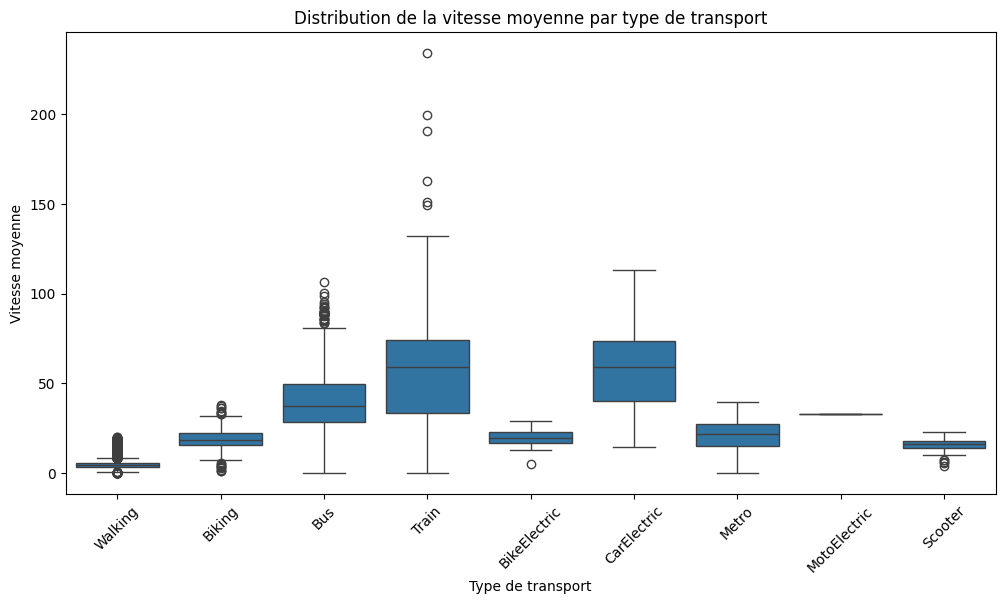

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Création d'un boxplot pour visualiser la distribution de la vitesse moyenne par type de transport
plt.figure(figsize=(12, 6))
sns.boxplot(x='subtrip_type', y='avg_speed', data=filtered_data)
plt.title('Distribution de la vitesse moyenne par type de transport')
plt.xticks(rotation=45)
plt.ylabel('Vitesse moyenne')
plt.xlabel('Type de transport')
plt.show()


In [12]:

# Définir les seuils de durée maximale acceptables pour chaque mode de transport, en secondes
# Ces valeurs sont des exemples et peuvent nécessiter des ajustements
duration_thresholds = {
    "Walking": 8 * 3600,  # 8 heures en secondes
    "Biking": 12 * 3600,  # 12 heures en secondes
    "Bus": 48 * 3600,     # 24 heures en secondes
    "Train": 48 * 3600,   # 48 heures en secondes
    "Car": 48 * 3600 ,     # 24 heures en secondes
    "BikeElectric" : 12 * 3600,
    "CarElectric" : 48 * 3600 ,
    "Metro": 24 * 3600 , 
    "MotoElectric": 12 * 3600 ,
    "Scooter" : 6 * 3600 
}

# Filtrer les données en éliminant les enregistrements avec des durées incohérentes
filtered_data_duration = pd.DataFrame()
for transport_mode, duration_limit in duration_thresholds.items():
    # Sélectionner les données pour le mode de transport actuel
    mode_data = filtered_data[filtered_data['subtrip_type'] == transport_mode]
    
    # Filtrer les données basées sur le seuil de durée
    mode_data_filtered = mode_data[mode_data['duration_seconds'] <= duration_limit]
    
    # Ajouter au DataFrame filtré
    filtered_data_duration = pd.concat([filtered_data_duration, mode_data_filtered])

# Vérifier les dimensions avant et après le filtrage de la durée
filtered_shape_before_duration_filter = filtered_data.shape
filtered_shape_after_duration_filter = filtered_data_duration.shape

filtered_shape_before_duration_filter, filtered_shape_after_duration_filter


((8618, 19), (8598, 19))

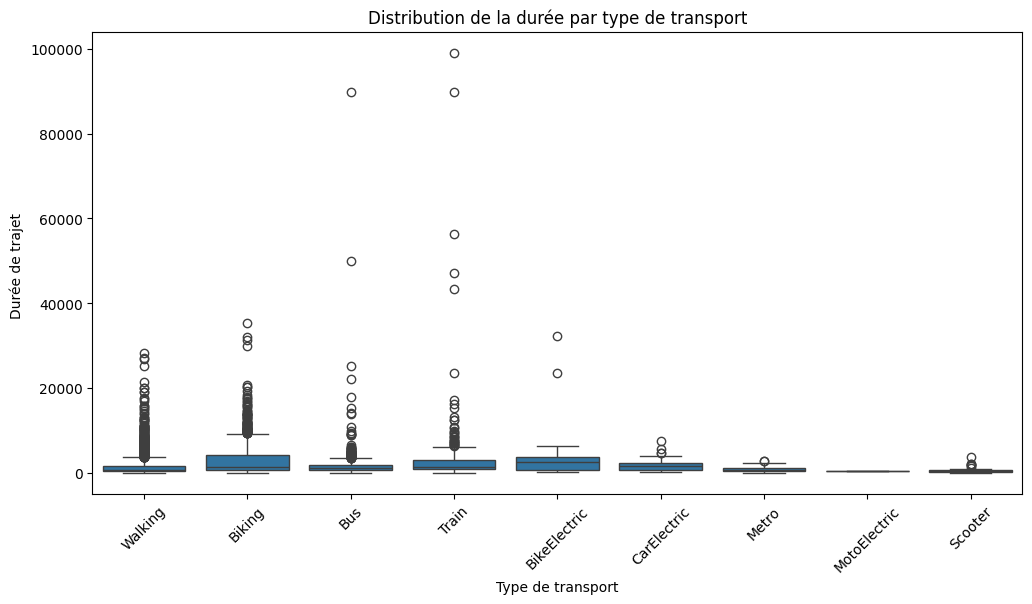

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='subtrip_type', y='duration_seconds', data=filtered_data_duration)
plt.title('Distribution de la durée par type de transport')
plt.xticks(rotation=45)
plt.ylabel('Durée de trajet ')
plt.xlabel('Type de transport')
plt.show()

#boxplot pour voir nos outlier et si apres flitrage les données sont correctes

In [14]:
filtered_data_duration.to_csv("trip_subtrip_cohérente.csv",sep = ";")
#sauvegarde en csv 